# 📊 E-Commerce Data Analysis: Top 100 Products
## Phân Tích Độ Tin Cậy và Khả Năng Bán Hàng

**Mục tiêu:**
- Sử dụng **K-Means Clustering** để phân nhóm sản phẩm
- Sử dụng **Linear Regression** để dự đoán khả năng bán hàng
- Đánh giá độ tin cậy dựa trên reviews và ratings
- Visualize với biểu đồ và bảng thống kê chi tiết

## 1. Import Libraries và Load Data

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Import libraries thành công!")

✅ Import libraries thành công!


In [2]:
# Load dữ liệu products và reviews
products_df = pd.read_csv('src/scraping/extracted_products.csv')
reviews_df = pd.read_csv('src/scraping/product_reviews.csv')

print("📊 THÔNG TIN DỮ LIỆU")
print("="*60)
print(f"Tổng số sản phẩm: {len(products_df):,}")
print(f"Tổng số reviews: {len(reviews_df):,}")
print(f"\nColumns trong products: {list(products_df.columns)}")
print(f"\nColumns trong reviews: {list(reviews_df.columns)}")
print("\n" + "="*60)
print("\n🔍 Preview Products:")
display(products_df.head())
print("\n🔍 Preview Reviews:")
display(reviews_df.head())

📊 THÔNG TIN DỮ LIỆU
Tổng số sản phẩm: 16,980
Tổng số reviews: 31,216

Columns trong products: ['id', 'name', 'price', 'original_price', 'discount', 'rating', 'quantity_sold', 'specifications', 'stock_item', 'brand_name']

Columns trong reviews: ['product_id', 'review_id', 'title', 'content', 'rating', 'author', 'time', 'helpful_count']


🔍 Preview Products:


,id,name,price,original_price,discount,rating,quantity_sold,specifications,stock_item,brand_name
0,278905095,Điện Thoại Realme Note 60x 4GB/64GB - Hàng Chí...,1990000,2490000,20,0.0,0,"[{'name': 'Thương hiệu', 'value': 'Realme'}, {...","{'max_sale_qty': 1000, 'min_sale_qty': 1, 'pre...",Realme
1,276062770,Điện Thoại Xiaomi Redmi 14C 4GB/128GB - Hàng C...,2499000,3290000,24,0.0,2,"[{'name': 'Bluetooth', 'value': 'Bluetooth 5.0...","{'max_sale_qty': 1000, 'min_sale_qty': 1, 'pre...",Xiaomi
2,278609733,Điện thoại POCO C85 (6GB/128GB) - Hàng Chính Hãng,2690000,2990000,10,0.0,0,"[{'name': 'Thương hiệu', 'value': 'POCO'}, {'n...","{'max_sale_qty': 1000, 'min_sale_qty': 1, 'pre...",POCO
3,277944334,Điện Thoại Samsung Galaxy A06 5G 4GB/64GB - Hà...,2469000,3490000,29,5.0,3,"[{'name': 'Dung lượng pin', 'value': '5000mAh'...","{'max_sale_qty': 1000, 'min_sale_qty': 1, 'pre...",Samsung
4,277737595,Điện Thoại Samsung Galaxy A06 5G 4GB/128GB - H...,2749000,4490000,39,4.8,16,"[{'name': 'Dung lượng pin', 'value': '5000mAH'...","{'max_sale_qty': 1000, 'min_sale_qty': 1, 'pre...",Samsung



🔍 Preview Reviews:


,product_id,review_id,title,content,rating,author,time,helpful_count
0,277944334,20171597,Cực kì hài lòng,nói chung với tầm giá đó thì rất hời rồi. Học ...,5,Nguyễn Bá Hùng,1758166281,0
1,277737595,20174536,Cực kì hài lòng,Nhan vien giao hàng k than thien. Toi de nghi ...,5,vo tran chi,1758861803,0
2,277737595,20182803,Cực kì hài lòng,"Ngon bổ rẻ, cám ơm shop, nếu có cơ hội sẽ ủng ...",5,Vo Dai Nghia,1760791470,0
3,277737595,20173329,Cực kì hài lòng,"hàng chính hãng, nguyên seal.",5,Tran Quang,1758549075,0
4,277737595,20158981,Cực kì hài lòng,"Điện thoại sài mượt , hàng nguyên siêu , đóng ...",5,Nguyễn Vương Linh,1755238026,0


In [3]:
#delete duplicate reviews_id in reviews_df, and products_id in products_df data
reviews_df.drop_duplicates(subset=['review_id'], inplace=True)
products_df.drop_duplicates(subset=['id'], inplace=True)

print(f"non-duplicate reviews: {len(reviews_df)}")
print(f"non-duplicate products: {len(products_df)}")

#clean review data
reviews_df.dropna(subset=['content'], inplace=True)
print(f"the number of data after removing null content: {len(reviews_df)}")

non-duplicate reviews: 4580
non-duplicate products: 2339
the number of data after removing null content: 2501


In [4]:
orphaned_reviews = reviews_df[~reviews_df['product_id'].isin(products_df['id'])]
print(f"Số review không có sản phẩm liên quan: {len(orphaned_reviews)}")

#hiện thị demo một vài review không có sản phẩm liên quan
print("\n🔍 Demo một vài review không có sản phẩm liên quan:")
print(orphaned_reviews.head())

#delete and reviews of the products has reviews but product[rating] = 0
zero_rating_reviews = products_df[(products_df['rating'] == 0) & (products_df['id'].isin(reviews_df['product_id']))]
products_df = products_df[products_df['id'].isin(zero_rating_reviews['id']) == False]
reviews_df = reviews_df[reviews_df['product_id'].isin(zero_rating_reviews['id']) == False]

Số review không có sản phẩm liên quan: 0

🔍 Demo một vài review không có sản phẩm liên quan:
Empty DataFrame
Columns: [product_id, review_id, title, content, rating, author, time, helpful_count]
Index: []


## 2. Data Preprocessing và Feature Engineering

In [5]:
# Tính toán các metrics cho reviews
review_stats = reviews_df.groupby('product_id').agg({
    'review_id': 'count',
    'rating': ['mean', 'std'],
    'helpful_count': 'sum'
}).reset_index()

review_stats.columns = ['product_id', 'review_count', 'avg_rating_from_reviews', 'rating_std', 'total_helpful']

# Merge với products data
df = products_df.merge(review_stats, left_on='id', right_on='product_id', how='left')

# Fill NaN values
df['review_count'] = df['review_count'].fillna(0)
df['avg_rating_from_reviews'] = df['avg_rating_from_reviews'].fillna(df['rating'])
df['rating_std'] = df['rating_std'].fillna(0)
df['total_helpful'] = df['total_helpful'].fillna(0)

# Tạo các features mới
df['discount_amount'] = df['original_price'] - df['price']
df['discount_percentage'] = df['discount']
df['has_reviews'] = (df['review_count'] > 0).astype(int)
df['rating_reliability'] = df['rating'] * np.log1p(df['review_count'])  # Độ tin cậy = rating * log(số reviews)
df['sales_potential'] = df['quantity_sold'] * df['price']  # Tiềm năng bán hàng
df['engagement_score'] = df['review_count'] + df['total_helpful']  # Điểm tương tác

print("✅ Feature Engineering hoàn thành!")
print(f"\n📊 Dataset shape: {df.shape}")
print(f"\nNew features created:")
print("  - discount_amount: Số tiền giảm giá")
print("  - rating_reliability: Độ tin cậy rating (rating × log(reviews))")
print("  - sales_potential: Tiềm năng bán (quantity_sold × price)")
print("  - engagement_score: Điểm tương tác (reviews + helpful)")
display(df[['name', 'rating', 'review_count', 'rating_reliability', 'sales_potential', 'engagement_score']].head(10))

✅ Feature Engineering hoàn thành!

📊 Dataset shape: (2256, 21)

New features created:
  - discount_amount: Số tiền giảm giá
  - rating_reliability: Độ tin cậy rating (rating × log(reviews))
  - sales_potential: Tiềm năng bán (quantity_sold × price)
  - engagement_score: Điểm tương tác (reviews + helpful)


,name,rating,review_count,rating_reliability,sales_potential,engagement_score
0,Điện Thoại Realme Note 60x 4GB/64GB - Hàng Chí...,0.0,0.0,0.000000,0,0.0
1,Điện Thoại Xiaomi Redmi 14C 4GB/128GB - Hàng C...,0.0,0.0,0.000000,4998000,0.0
2,Điện thoại POCO C85 (6GB/128GB) - Hàng Chính Hãng,0.0,0.0,0.000000,0,0.0
3,Điện Thoại Samsung Galaxy A06 5G 4GB/64GB - Hà...,5.0,1.0,3.465736,7407000,1.0
4,Điện Thoại Samsung Galaxy A06 5G 4GB/128GB - H...,4.8,4.0,7.725302,43984000,4.0
5,Điện thoại Xiaomi Redmi Note 9T 4GB/128GB 5G D...,0.0,0.0,0.000000,0,0.0
6,Điện thoại Xiaomi Redmi 13x - Hàng chính hãng,4.3,4.0,6.920583,901150000,4.0
7,Điện thoại Libero 5G III - 4/64GB Dimensity 70...,5.0,2.0,5.493061,24189000,2.0
8,Điện thoại Xiaomi Redmi A5 (3GB/64GB) - Hàng c...,0.0,0.0,0.000000,0,0.0
9,Điện thoại Realme Note 60 (6GB/128GB) Màn hình...,0.0,0.0,0.000000,0,0.0


In [6]:
# Chọn top 100 sản phẩm tốt nhất dựa trên sales_potential và rating_reliability
df['combined_score'] = (
    df['sales_potential'] / df['sales_potential'].max() * 0.4 +
    df['rating_reliability'] / df['rating_reliability'].max() * 0.3 +
    df['engagement_score'] / df['engagement_score'].max() * 0.3
)

top_100 = df.nlargest(100, 'combined_score').copy()

print("🏆 TOP 100 SẢN PHẨM TỐT NHẤT")
print("="*80)
print(f"Số lượng sản phẩm: {len(top_100)}")
print(f"\nThống kê cơ bản:")
print(top_100[['price', 'rating', 'quantity_sold', 'review_count', 'rating_reliability', 'sales_potential']].describe())
print("\n" + "="*80)
print("\n📋 Top 10 sản phẩm:")
display(top_100[['name', 'brand_name', 'price', 'rating', 'quantity_sold', 'review_count', 'combined_score']].head(10))

🏆 TOP 100 SẢN PHẨM TỐT NHẤT
Số lượng sản phẩm: 100

Thống kê cơ bản:
              price      rating  quantity_sold  review_count  \
count  1.000000e+02  100.000000     100.000000    100.000000   
mean   4.645698e+05    4.581000     754.620000     12.630000   
std    1.046351e+06    0.479835    3143.562406      4.267933   
min    7.920000e+03    1.000000       1.000000      3.000000   
25%    7.920000e+04    4.500000      33.500000      9.000000   
50%    1.366300e+05    4.700000      95.000000     13.000000   
75%    3.342500e+05    4.800000     297.750000     16.000000   
max    5.500000e+06    5.000000   29923.000000     20.000000   

       rating_reliability  sales_potential  
count          100.000000     1.000000e+02  
mean            11.688131     1.925893e+09  
std              1.873309     1.273867e+10  
min              2.995732     4.160000e+04  
25%             10.397208     3.729950e+06  
50%             11.630395     1.797000e+07  
75%             13.195287     5.259710e

,name,brand_name,price,rating,quantity_sold,review_count,combined_score
204,Điện Thoại Oppo A58 6GB/128GB - Hàng Chính Hãng,OPPO,4090000,5.0,29923,15.0,0.720932
365,Pin Sạc dự phòng Hoco J48 10.000 mAh Bảo Hành...,Hoco,249000,5.0,10,16.0,0.561004
1386,Chân Váy Ren Xòe Hoa Ba Lớp CV005 MayHomes - T...,MAYHOMES,89792,4.5,88,19.0,0.542972
2251,Ổ Cứng SSD Kingston A400 (240GB) - Hàng Chính ...,Kingston,1094000,4.8,49,19.0,0.538105
396,Tai nghe nhét tai New4all CK9 Sport Earphone m...,New4all,143200,4.1,137,15.0,0.524092
2001,Màn Hình Chuyên Đồ Họa Asus ProArt PA248QV 24....,Asus,5500000,5.0,32,20.0,0.498303
401,Tai Nghe Nhét Tai Mi Basic Xiaomi HSEJ03JY - H...,Xiaomi,100800,4.7,962,19.0,0.482343
502,Quần Tây Nam VFASHION VFS0014 - Đen,OEM,89600,4.8,32,16.0,0.445293
1180,Quần Jean Nữ Lưng Cao Skinny Aaa Jeans,AAA JEANS,389000,4.6,1284,18.0,0.398105
1842,Ba Lô Laptop Văn Phòng Cao Cấp PRAZA - BLTK174,Praza,144800,4.6,2016,18.0,0.381517


## 3. K-Means Clustering - Phân Nhóm Sản Phẩm

In [7]:
# Fix for OpenBLAS/threadpoolctl issue on macOS
import threadpoolctl
from unittest.mock import MagicMock

# Monkey-patch threadpoolctl to avoid the OpenBLAS issue
original_threadpool_info = threadpoolctl.threadpool_info

def patched_threadpool_info():
    try:
        return original_threadpool_info()
    except AttributeError:
        # Return empty list if there's an AttributeError
        return []

threadpoolctl.threadpool_info = patched_threadpool_info

print("✅ Applied threadpoolctl patch for macOS compatibility")

✅ Applied threadpoolctl patch for macOS compatibility


🔍 PHÂN TÍCH DỰA TRÊN 3 BIẾN CHÍNH
📌 Biến độc lập (dùng để phân cụm):
   1. price
   2. quantity_sold
   3. discount_percentage

📊 Biến phụ thuộc (phân tích sau khi phân cụm):
   1. rating
   2. review_count
   3. rating_reliability
   4. engagement_score


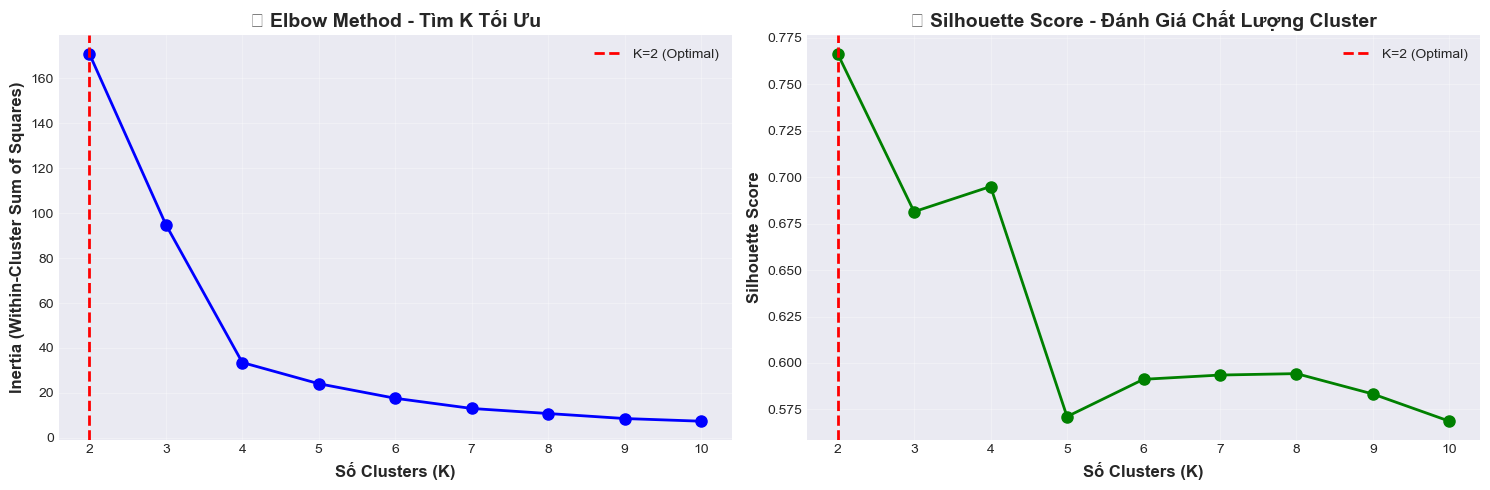


✅ Best K based on Silhouette Score: 2
   Max Silhouette Score: 0.7665


In [8]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHÂN TÍCH MỚI: Sử dụng GIÁ CẢ, LƯỢT BÁN, TỈ LỆ GIẢM GIÁ làm biến chính
# ═══════════════════════════════════════════════════════════════════════════════

# Chuẩn bị features cho K-Means - CHỈ SỬ DỤNG 3 BIẾN CHÍNH
primary_features = ['price', 'quantity_sold', 'discount_percentage']

# Các biến phụ thuộc để phân tích sau
dependent_features = ['rating', 'review_count', 'rating_reliability', 'engagement_score']

X_cluster = top_100[primary_features].copy()

print("🔍 PHÂN TÍCH DỰA TRÊN 3 BIẾN CHÍNH")
print("="*80)
print("📌 Biến độc lập (dùng để phân cụm):")
for i, feature in enumerate(primary_features, 1):
    print(f"   {i}. {feature}")
print("\n📊 Biến phụ thuộc (phân tích sau khi phân cụm):")
for i, feature in enumerate(dependent_features, 1):
    print(f"   {i}. {feature}")
print("="*80)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Tìm số cluster tối ưu bằng Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Vẽ Elbow Curve và Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Số Clusters (K)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
axes[0].set_title('📊 Elbow Method - Tìm K Tối Ưu', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Tìm optimal K
optimal_k_idx = np.argmax(silhouette_scores)
optimal_k_value = K_range[optimal_k_idx]
axes[0].axvline(x=optimal_k_value, color='red', linestyle='--', label=f'K={optimal_k_value} (Optimal)', linewidth=2)
axes[0].legend()

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Số Clusters (K)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('📊 Silhouette Score - Đánh Giá Chất Lượng Cluster', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=optimal_k_value, color='red', linestyle='--', label=f'K={optimal_k_value} (Optimal)', linewidth=2)
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Best K based on Silhouette Score: {optimal_k_value}")
print(f"   Max Silhouette Score: {max(silhouette_scores):.4f}")

In [9]:
# Apply K-Means với K tối ưu
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
top_100['cluster'] = kmeans.fit_predict(X_scaled)

# Thống kê chi tiết các cluster - BẢN MỞ RỘNG
print("📊 THỐNG KÊ CHI TIẾT CÁC CLUSTER")
print("="*120)

# Thống kê biến chính (dùng để phân cụm)
cluster_primary_stats = top_100.groupby('cluster').agg({
    'price': ['mean', 'std', 'min', 'max'],
    'quantity_sold': ['sum', 'mean', 'std', 'max'],
    'discount_percentage': ['mean', 'std', 'min', 'max'],
    'id': 'count'
}).round(2)

cluster_primary_stats.columns = ['_'.join(col).strip() for col in cluster_primary_stats.columns.values]
cluster_primary_stats = cluster_primary_stats.rename(columns={'id_count': 'product_count'})

print("\n🎯 BIẾN CHÍNH (Dùng để phân cụm):")
print("-"*120)
display(cluster_primary_stats)

# Thống kê biến phụ thuộc
cluster_dependent_stats = top_100.groupby('cluster').agg({
    'rating': ['mean', 'std', 'min', 'max'],
    'review_count': ['sum', 'mean', 'max'],
    'rating_reliability': ['mean', 'std', 'min', 'max'],
    'engagement_score': ['sum', 'mean', 'max']
}).round(2)

cluster_dependent_stats.columns = ['_'.join(col).strip() for col in cluster_dependent_stats.columns.values]

print("\n📊 BIẾN PHỤ THUỘC (Phân tích sau khi phân cụm):")
print("-"*120)
display(cluster_dependent_stats)

print("\n" + "="*120)

📊 THỐNG KÊ CHI TIẾT CÁC CLUSTER

🎯 BIẾN CHÍNH (Dùng để phân cụm):
------------------------------------------------------------------------------------------------------------------------


,price_mean,price_std,price_min,price_max,quantity_sold_sum,quantity_sold_mean,quantity_sold_std,quantity_sold_max,discount_percentage_mean,discount_percentage_std,discount_percentage_min,discount_percentage_max,product_count
cluster,,,,,,,,,,,,,
0,4451666.67,727857.59,3790000,5500000,45657,7609.50,11256.16,29923,11.67,11.57,0,25,6
1,210074.26,214312.90,7920,1094000,29805,317.07,694.67,5366,25.71,15.35,6,64,94



📊 BIẾN PHỤ THUỘC (Phân tích sau khi phân cụm):
------------------------------------------------------------------------------------------------------------------------


,rating_mean,rating_std,rating_min,rating_max,review_count_sum,review_count_mean,review_count_max,rating_reliability_mean,rating_reliability_std,rating_reliability_min,rating_reliability_max,engagement_score_sum,engagement_score_mean,engagement_score_max
cluster,,,,,,,,,,,,,,
0,4.90,0.15,4.7,5.0,77.0,12.83,20.0,12.21,3.22,6.52,15.22,162.0,27.00,87.0
1,4.56,0.49,1.0,5.0,1186.0,12.62,20.0,11.65,1.78,3.00,14.72,2361.0,25.12,132.0


In [10]:
# Phân tích và đặt tên cho các cluster dựa trên 3 biến chính
cluster_names = {}

print("\n🏷️  PHÂN TÍCH VÀ ĐẶT TÊN CÁC CLUSTER")
print("="*100)

for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    
    # Phân tích đặc điểm cluster dựa trên 3 biến chính
    avg_price = cluster_data['price'].mean()
    avg_quantity = cluster_data['quantity_sold'].mean()
    avg_discount = cluster_data['discount_percentage'].mean()
    total_quantity = cluster_data['quantity_sold'].sum()
    count = len(cluster_data)
    
    # Phân tích biến phụ thuộc
    avg_rating = cluster_data['rating'].mean()
    avg_reviews = cluster_data['review_count'].mean()
    avg_reliability = cluster_data['rating_reliability'].mean()
    avg_engagement = cluster_data['engagement_score'].mean()
    
    # Xác định tên cluster dựa trên đặc điểm
    price_level = "Cao" if avg_price > top_100['price'].quantile(0.66) else "Thấp" if avg_price < top_100['price'].quantile(0.33) else "Trung Bình"
    sales_level = "Bán Chạy" if avg_quantity > top_100['quantity_sold'].quantile(0.66) else "Ít Bán" if avg_quantity < top_100['quantity_sold'].quantile(0.33) else "TB"
    discount_level = "Giảm Mạnh" if avg_discount > top_100['discount_percentage'].quantile(0.66) else "Ít Giảm" if avg_discount < top_100['discount_percentage'].quantile(0.33) else "Giảm Vừa"
    
    # Tạo tên cluster
    cluster_name = f"{price_level} - {sales_level} - {discount_level}"
    cluster_names[cluster_id] = cluster_name
    
    print(f"\n🔹 Cluster {cluster_id}: {cluster_name}")
    print(f"   📦 Số sản phẩm: {count}")
    print(f"   💰 Giá trung bình: {avg_price:,.0f} VNĐ")
    print(f"   📊 Lượt bán TB: {avg_quantity:.0f} (Tổng: {total_quantity:,.0f})")
    print(f"   🎯 Giảm giá TB: {avg_discount:.1f}%")
    print(f"   ⭐ Rating TB: {avg_rating:.2f} | Reviews TB: {avg_reviews:.0f}")
    print(f"   📈 Độ tin cậy TB: {avg_reliability:.2f} | Engagement TB: {avg_engagement:.0f}")

top_100['cluster_name'] = top_100['cluster'].map(cluster_names)

print("\n" + "="*100)
print("\n✅ Đã gán tên cho tất cả các cluster!")


🏷️  PHÂN TÍCH VÀ ĐẶT TÊN CÁC CLUSTER

🔹 Cluster 0: Cao - Bán Chạy - Ít Giảm
   📦 Số sản phẩm: 6
   💰 Giá trung bình: 4,451,667 VNĐ
   📊 Lượt bán TB: 7610 (Tổng: 45,657)
   🎯 Giảm giá TB: 11.7%
   ⭐ Rating TB: 4.90 | Reviews TB: 13
   📈 Độ tin cậy TB: 12.21 | Engagement TB: 27

🔹 Cluster 1: Trung Bình - Bán Chạy - Giảm Mạnh
   📦 Số sản phẩm: 94
   💰 Giá trung bình: 210,074 VNĐ
   📊 Lượt bán TB: 317 (Tổng: 29,805)
   🎯 Giảm giá TB: 25.7%
   ⭐ Rating TB: 4.56 | Reviews TB: 13
   📈 Độ tin cậy TB: 11.65 | Engagement TB: 25


✅ Đã gán tên cho tất cả các cluster!


🎨 Đang tạo biểu đồ visualization...
   - Số clusters: 2
   - Số sản phẩm: 100
   - Vẽ biểu đồ 1/9: Price vs Quantity Sold
   - Vẽ biểu đồ 2/9: Price vs Discount
   - Vẽ biểu đồ 3/9: Quantity Sold vs Discount
   - Vẽ biểu đồ 4/9: Rating Distribution
   - Vẽ biểu đồ 5/9: Review Count Distribution
   - Vẽ biểu đồ 6/9: Price vs Rating
   - Vẽ biểu đồ 7/9: Quantity Sold vs Review Count
   - Vẽ biểu đồ 8/9: Product Count per Cluster
   - Vẽ biểu đồ 9/9: Bubble chart (3 biến chính)


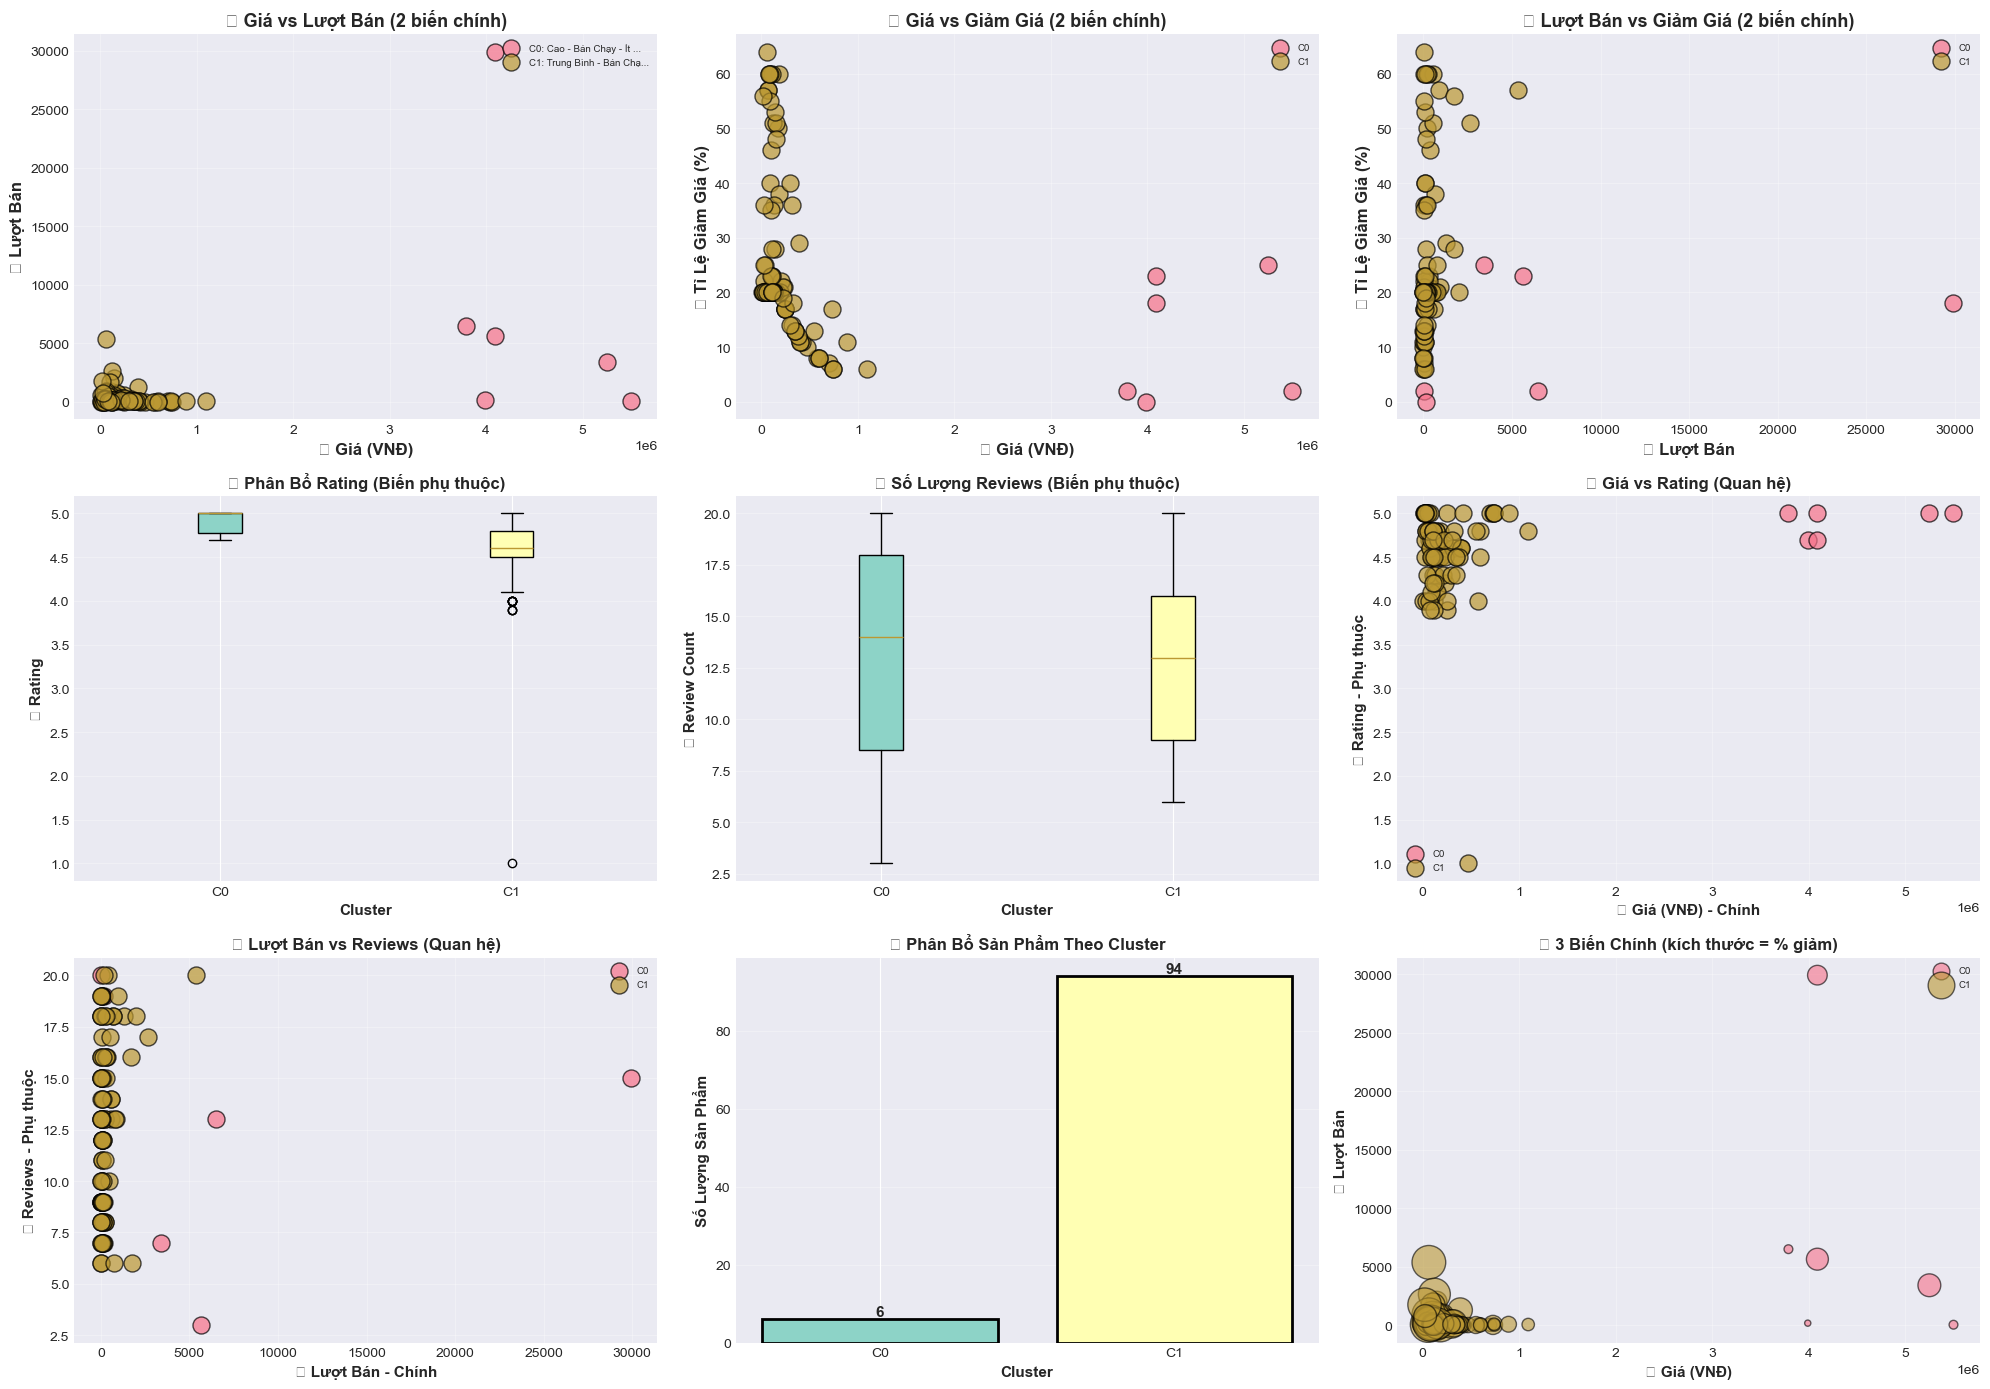


✅ Đã tạo 9 biểu đồ phân tích cluster!


In [11]:
# Visualize Clusters - Tập trung vào 3 biến chính và mối quan hệ với biến phụ thuộc
print("🎨 Đang tạo biểu đồ visualization...")
print(f"   - Số clusters: {optimal_k}")
print(f"   - Số sản phẩm: {len(top_100)}")

fig = plt.figure(figsize=(20, 14))

# ═══════════════ PHẦN 1: BIẾN CHÍNH (3 biểu đồ) ═══════════════

# 1. Scatter: Price vs Quantity Sold (2 BIẾN CHÍNH)
print("   - Vẽ biểu đồ 1/9: Price vs Quantity Sold")
ax1 = plt.subplot(3, 3, 1)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:  # Kiểm tra cluster có dữ liệu
        ax1.scatter(cluster_data['price'], cluster_data['quantity_sold'], 
                   s=150, alpha=0.7, label=f"C{cluster_id}: {cluster_names[cluster_id][:20]}...", 
                   edgecolors='black', linewidth=1)
ax1.set_xlabel('💰 Giá (VNĐ)', fontsize=12, fontweight='bold')
ax1.set_ylabel('📊 Lượt Bán', fontsize=12, fontweight='bold')
ax1.set_title('📊 Giá vs Lượt Bán (2 biến chính)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=7, loc='best')
ax1.grid(True, alpha=0.3)

# 2. Scatter: Price vs Discount (2 BIẾN CHÍNH)
print("   - Vẽ biểu đồ 2/9: Price vs Discount")
ax2 = plt.subplot(3, 3, 2)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        ax2.scatter(cluster_data['price'], cluster_data['discount_percentage'], 
                   s=150, alpha=0.7, label=f"C{cluster_id}", edgecolors='black', linewidth=1)
ax2.set_xlabel('💰 Giá (VNĐ)', fontsize=12, fontweight='bold')
ax2.set_ylabel('🎯 Tỉ Lệ Giảm Giá (%)', fontsize=12, fontweight='bold')
ax2.set_title('💰 Giá vs Giảm Giá (2 biến chính)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=7, loc='best')
ax2.grid(True, alpha=0.3)

# 3. Scatter: Quantity Sold vs Discount (2 BIẾN CHÍNH)
print("   - Vẽ biểu đồ 3/9: Quantity Sold vs Discount")
ax3 = plt.subplot(3, 3, 3)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        ax3.scatter(cluster_data['quantity_sold'], cluster_data['discount_percentage'], 
                   s=150, alpha=0.7, label=f"C{cluster_id}", edgecolors='black', linewidth=1)
ax3.set_xlabel('📊 Lượt Bán', fontsize=12, fontweight='bold')
ax3.set_ylabel('🎯 Tỉ Lệ Giảm Giá (%)', fontsize=12, fontweight='bold')
ax3.set_title('📊 Lượt Bán vs Giảm Giá (2 biến chính)', fontsize=13, fontweight='bold')
ax3.legend(fontsize=7, loc='best')
ax3.grid(True, alpha=0.3)

# ═══════════════ PHẦN 2: BIẾN PHỤ THUỘC (4 biểu đồ) ═══════════════

# 4. Box Plot: Rating Distribution by Cluster (PHỤ THUỘC)
print("   - Vẽ biểu đồ 4/9: Rating Distribution")
ax4 = plt.subplot(3, 3, 4)
cluster_order = sorted(top_100['cluster'].unique())
rating_data = [top_100[top_100['cluster'] == c]['rating'].values for c in cluster_order]
bp = ax4.boxplot(rating_data, labels=[f'C{c}' for c in cluster_order], patch_artist=True)
for patch, cluster_id in zip(bp['boxes'], cluster_order):
    patch.set_facecolor(plt.cm.Set3(cluster_id))
ax4.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax4.set_ylabel('⭐ Rating', fontsize=11, fontweight='bold')
ax4.set_title('⭐ Phân Bổ Rating (Biến phụ thuộc)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Box Plot: Review Count by Cluster (PHỤ THUỘC)
print("   - Vẽ biểu đồ 5/9: Review Count Distribution")
ax5 = plt.subplot(3, 3, 5)
review_data = [top_100[top_100['cluster'] == c]['review_count'].values for c in cluster_order]
bp2 = ax5.boxplot(review_data, labels=[f'C{c}' for c in cluster_order], patch_artist=True)
for patch, cluster_id in zip(bp2['boxes'], cluster_order):
    patch.set_facecolor(plt.cm.Set3(cluster_id))
ax5.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax5.set_ylabel('💬 Review Count', fontsize=11, fontweight='bold')
ax5.set_title('💬 Số Lượng Reviews (Biến phụ thuộc)', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Scatter: Price vs Rating (CHÍNH vs PHỤ THUỘC)
print("   - Vẽ biểu đồ 6/9: Price vs Rating")
ax6 = plt.subplot(3, 3, 6)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        ax6.scatter(cluster_data['price'], cluster_data['rating'], 
                   s=150, alpha=0.7, label=f"C{cluster_id}", edgecolors='black', linewidth=1)
ax6.set_xlabel('💰 Giá (VNĐ) - Chính', fontsize=11, fontweight='bold')
ax6.set_ylabel('⭐ Rating - Phụ thuộc', fontsize=11, fontweight='bold')
ax6.set_title('💰 Giá vs Rating (Quan hệ)', fontsize=12, fontweight='bold')
ax6.legend(fontsize=7)
ax6.grid(True, alpha=0.3)

# 7. Scatter: Quantity Sold vs Review Count (CHÍNH vs PHỤ THUỘC)
print("   - Vẽ biểu đồ 7/9: Quantity Sold vs Review Count")
ax7 = plt.subplot(3, 3, 7)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        ax7.scatter(cluster_data['quantity_sold'], cluster_data['review_count'], 
                   s=150, alpha=0.7, label=f"C{cluster_id}", edgecolors='black', linewidth=1)
ax7.set_xlabel('📊 Lượt Bán - Chính', fontsize=11, fontweight='bold')
ax7.set_ylabel('💬 Reviews - Phụ thuộc', fontsize=11, fontweight='bold')
ax7.set_title('📊 Lượt Bán vs Reviews (Quan hệ)', fontsize=12, fontweight='bold')
ax7.legend(fontsize=7)
ax7.grid(True, alpha=0.3)

# 8. Bar Chart: Product Count per Cluster
print("   - Vẽ biểu đồ 8/9: Product Count per Cluster")
ax8 = plt.subplot(3, 3, 8)
cluster_counts = top_100['cluster'].value_counts().sort_index()
colors = plt.cm.Set3(range(len(cluster_counts)))
bars = ax8.bar([f'C{i}' for i in cluster_counts.index], cluster_counts.values, 
               color=colors, edgecolor='black', linewidth=2)
ax8.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax8.set_ylabel('Số Lượng Sản Phẩm', fontsize=11, fontweight='bold')
ax8.set_title('📦 Phân Bổ Sản Phẩm Theo Cluster', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 9. Scatter 3D-style: Bubble chart (Price, Quantity, Discount)
print("   - Vẽ biểu đồ 9/9: Bubble chart (3 biến chính)")
ax9 = plt.subplot(3, 3, 9)
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        # Size represents discount percentage - FIX: Thêm min size để tránh size = 0
        sizes = cluster_data['discount_percentage'] * 10 + 20  # Thêm 20 để đảm bảo min size
        ax9.scatter(cluster_data['price'], cluster_data['quantity_sold'], 
                   s=sizes, alpha=0.6, label=f"C{cluster_id}", edgecolors='black', linewidth=1)
ax9.set_xlabel('💰 Giá (VNĐ)', fontsize=11, fontweight='bold')
ax9.set_ylabel('📊 Lượt Bán', fontsize=11, fontweight='bold')
ax9.set_title('🎯 3 Biến Chính (kích thước = % giảm)', fontsize=12, fontweight='bold')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Đã tạo 9 biểu đồ phân tích cluster!")

## 3.5. Phân Tích Mối Quan Hệ: Biến Chính → Biến Phụ Thuộc

In [12]:
# Phân tích tương quan giữa biến chính và biến phụ thuộc
import scipy.stats as stats

print("🔍 PHÂN TÍCH MỐI QUAN HỆ: BIẾN CHÍNH → BIẾN PHỤ THUỘC")
print("="*100)

# Tính correlation cho từng cluster
for cluster_id in range(optimal_k):
    cluster_data = top_100[top_100['cluster'] == cluster_id]
    
    print(f"\n{'='*100}")
    print(f"📊 Cluster {cluster_id}: {cluster_names[cluster_id]}")
    print(f"   Số sản phẩm: {len(cluster_data)}")
    print(f"{'='*100}")
    
    # Phân tích từng biến chính với biến phụ thuộc
    for primary in primary_features:
        print(f"\n🎯 {primary.upper()} → ảnh hưởng đến biến phụ thuộc:")
        
        for dependent in dependent_features:
            # Tính correlation
            corr, p_value = stats.pearsonr(cluster_data[primary], cluster_data[dependent])
            
            # Đánh giá mức độ tương quan
            if abs(corr) > 0.7:
                strength = "RẤT MẠNH ⭐⭐⭐"
            elif abs(corr) > 0.5:
                strength = "MẠNH ⭐⭐"
            elif abs(corr) > 0.3:
                strength = "TRUNG BÌNH ⭐"
            else:
                strength = "YẾU"
            
            direction = "THUẬN" if corr > 0 else "NGHỊCH"
            significance = "có ý nghĩa" if p_value < 0.05 else "không có ý nghĩa"
            
            print(f"   → {dependent:25s}: r={corr:6.3f} ({direction}, {strength}) - {significance} (p={p_value:.4f})")

print("\n" + "="*100)

🔍 PHÂN TÍCH MỐI QUAN HỆ: BIẾN CHÍNH → BIẾN PHỤ THUỘC

📊 Cluster 0: Cao - Bán Chạy - Ít Giảm
   Số sản phẩm: 6

🎯 PRICE → ảnh hưởng đến biến phụ thuộc:
   → rating                   : r= 0.438 (THUẬN, TRUNG BÌNH ⭐) - không có ý nghĩa (p=0.3849)
   → review_count             : r= 0.109 (THUẬN, YẾU) - không có ý nghĩa (p=0.8364)
   → rating_reliability       : r= 0.141 (THUẬN, YẾU) - không có ý nghĩa (p=0.7895)
   → engagement_score         : r= 0.591 (THUẬN, MẠNH ⭐⭐) - không có ý nghĩa (p=0.2168)

🎯 QUANTITY_SOLD → ảnh hưởng đến biến phụ thuộc:
   → rating                   : r= 0.324 (THUẬN, TRUNG BÌNH ⭐) - không có ý nghĩa (p=0.5310)
   → review_count             : r=-0.022 (NGHỊCH, YẾU) - không có ý nghĩa (p=0.9677)
   → rating_reliability       : r= 0.099 (THUẬN, YẾU) - không có ý nghĩa (p=0.8526)
   → engagement_score         : r=-0.263 (NGHỊCH, YẾU) - không có ý nghĩa (p=0.6141)

🎯 DISCOUNT_PERCENTAGE → ảnh hưởng đến biến phụ thuộc:
   → rating                   : r= 0.011 (THUẬN, 

## 4. Linear Regression - Dự Đoán Biến Phụ Thuộc từ Biến Chính

In [13]:
# ═══════════════════════════════════════════════════════════════════════════════
# LINEAR REGRESSION: Dự đoán BIẾN PHỤ THUỘC từ 3 BIẾN CHÍNH
# ═══════════════════════════════════════════════════════════════════════════════

print("🎯 MÔ HÌNH DỰ ĐOÁN: 3 BIẾN CHÍNH → BIẾN PHỤ THUỘC")
print("="*100)

# Biến độc lập (X): 3 biến chính
X = top_100[primary_features].copy()

# Lưu kết quả cho từng biến phụ thuộc
regression_results = {}

for target_feature in dependent_features:
    print(f"\n{'='*100}")
    print(f"📊 Dự đoán: {target_feature.upper()}")
    print(f"{'='*100}")
    
    # Target variable
    y = top_100[target_feature].copy()
    
    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler_reg = StandardScaler()
    X_train_scaled = scaler_reg.fit_transform(X_train)
    X_test_scaled = scaler_reg.transform(X_test)
    
    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = lr_model.predict(X_train_scaled)
    y_test_pred = lr_model.predict(X_test_scaled)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': primary_features,
        'Coefficient': lr_model.coef_,
        'Abs_Coefficient': np.abs(lr_model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    # Lưu kết quả
    regression_results[target_feature] = {
        'model': lr_model,
        'scaler': scaler_reg,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'feature_importance': feature_importance,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }
    
    print(f"\n🎯 Training Set:")
    print(f"   MSE: {train_mse:,.2f}")
    print(f"   R² Score: {train_r2:.4f} ({train_r2*100:.2f}%)")
    print(f"\n🎯 Testing Set:")
    print(f"   MSE: {test_mse:,.2f}")
    print(f"   R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
    
    print(f"\n📊 FEATURE IMPORTANCE (Hệ số tác động):")
    for idx, row in feature_importance.iterrows():
        direction = "⬆" if row['Coefficient'] > 0 else "⬇"
        print(f"   {direction} {row['Feature']:20s}: {row['Coefficient']:8.2f} (|{row['Abs_Coefficient']:.2f}|)")

print("\n" + "="*100)
print("✅ Hoàn thành dự đoán cho tất cả biến phụ thuộc!")

🎯 MÔ HÌNH DỰ ĐOÁN: 3 BIẾN CHÍNH → BIẾN PHỤ THUỘC

📊 Dự đoán: RATING

🎯 Training Set:
   MSE: 0.26
   R² Score: 0.0122 (1.22%)

🎯 Testing Set:
   MSE: 0.08
   R² Score: 0.1841 (18.41%)

📊 FEATURE IMPORTANCE (Hệ số tác động):
   ⬆ price               :     0.05 (|0.05|)
   ⬆ discount_percentage :     0.03 (|0.03|)
   ⬆ quantity_sold       :     0.02 (|0.02|)

📊 Dự đoán: REVIEW_COUNT

🎯 Training Set:
   MSE: 17.82
   R² Score: 0.0212 (2.12%)

🎯 Testing Set:
   MSE: 20.33
   R² Score: -0.1717 (-17.17%)

📊 FEATURE IMPORTANCE (Hệ số tác động):
   ⬆ price               :     0.69 (|0.69|)
   ⬆ discount_percentage :     0.25 (|0.25|)
   ⬇ quantity_sold       :    -0.14 (|0.14|)

📊 Dự đoán: RATING_RELIABILITY

🎯 Training Set:
   MSE: 3.65
   R² Score: 0.0216 (2.16%)

🎯 Testing Set:
   MSE: 5.04
   R² Score: -1.0554 (-105.54%)

📊 FEATURE IMPORTANCE (Hệ số tác động):
   ⬆ price               :     0.29 (|0.29|)
   ⬆ discount_percentage :     0.22 (|0.22|)
   ⬇ quantity_sold       :    -0.19 (|0.1

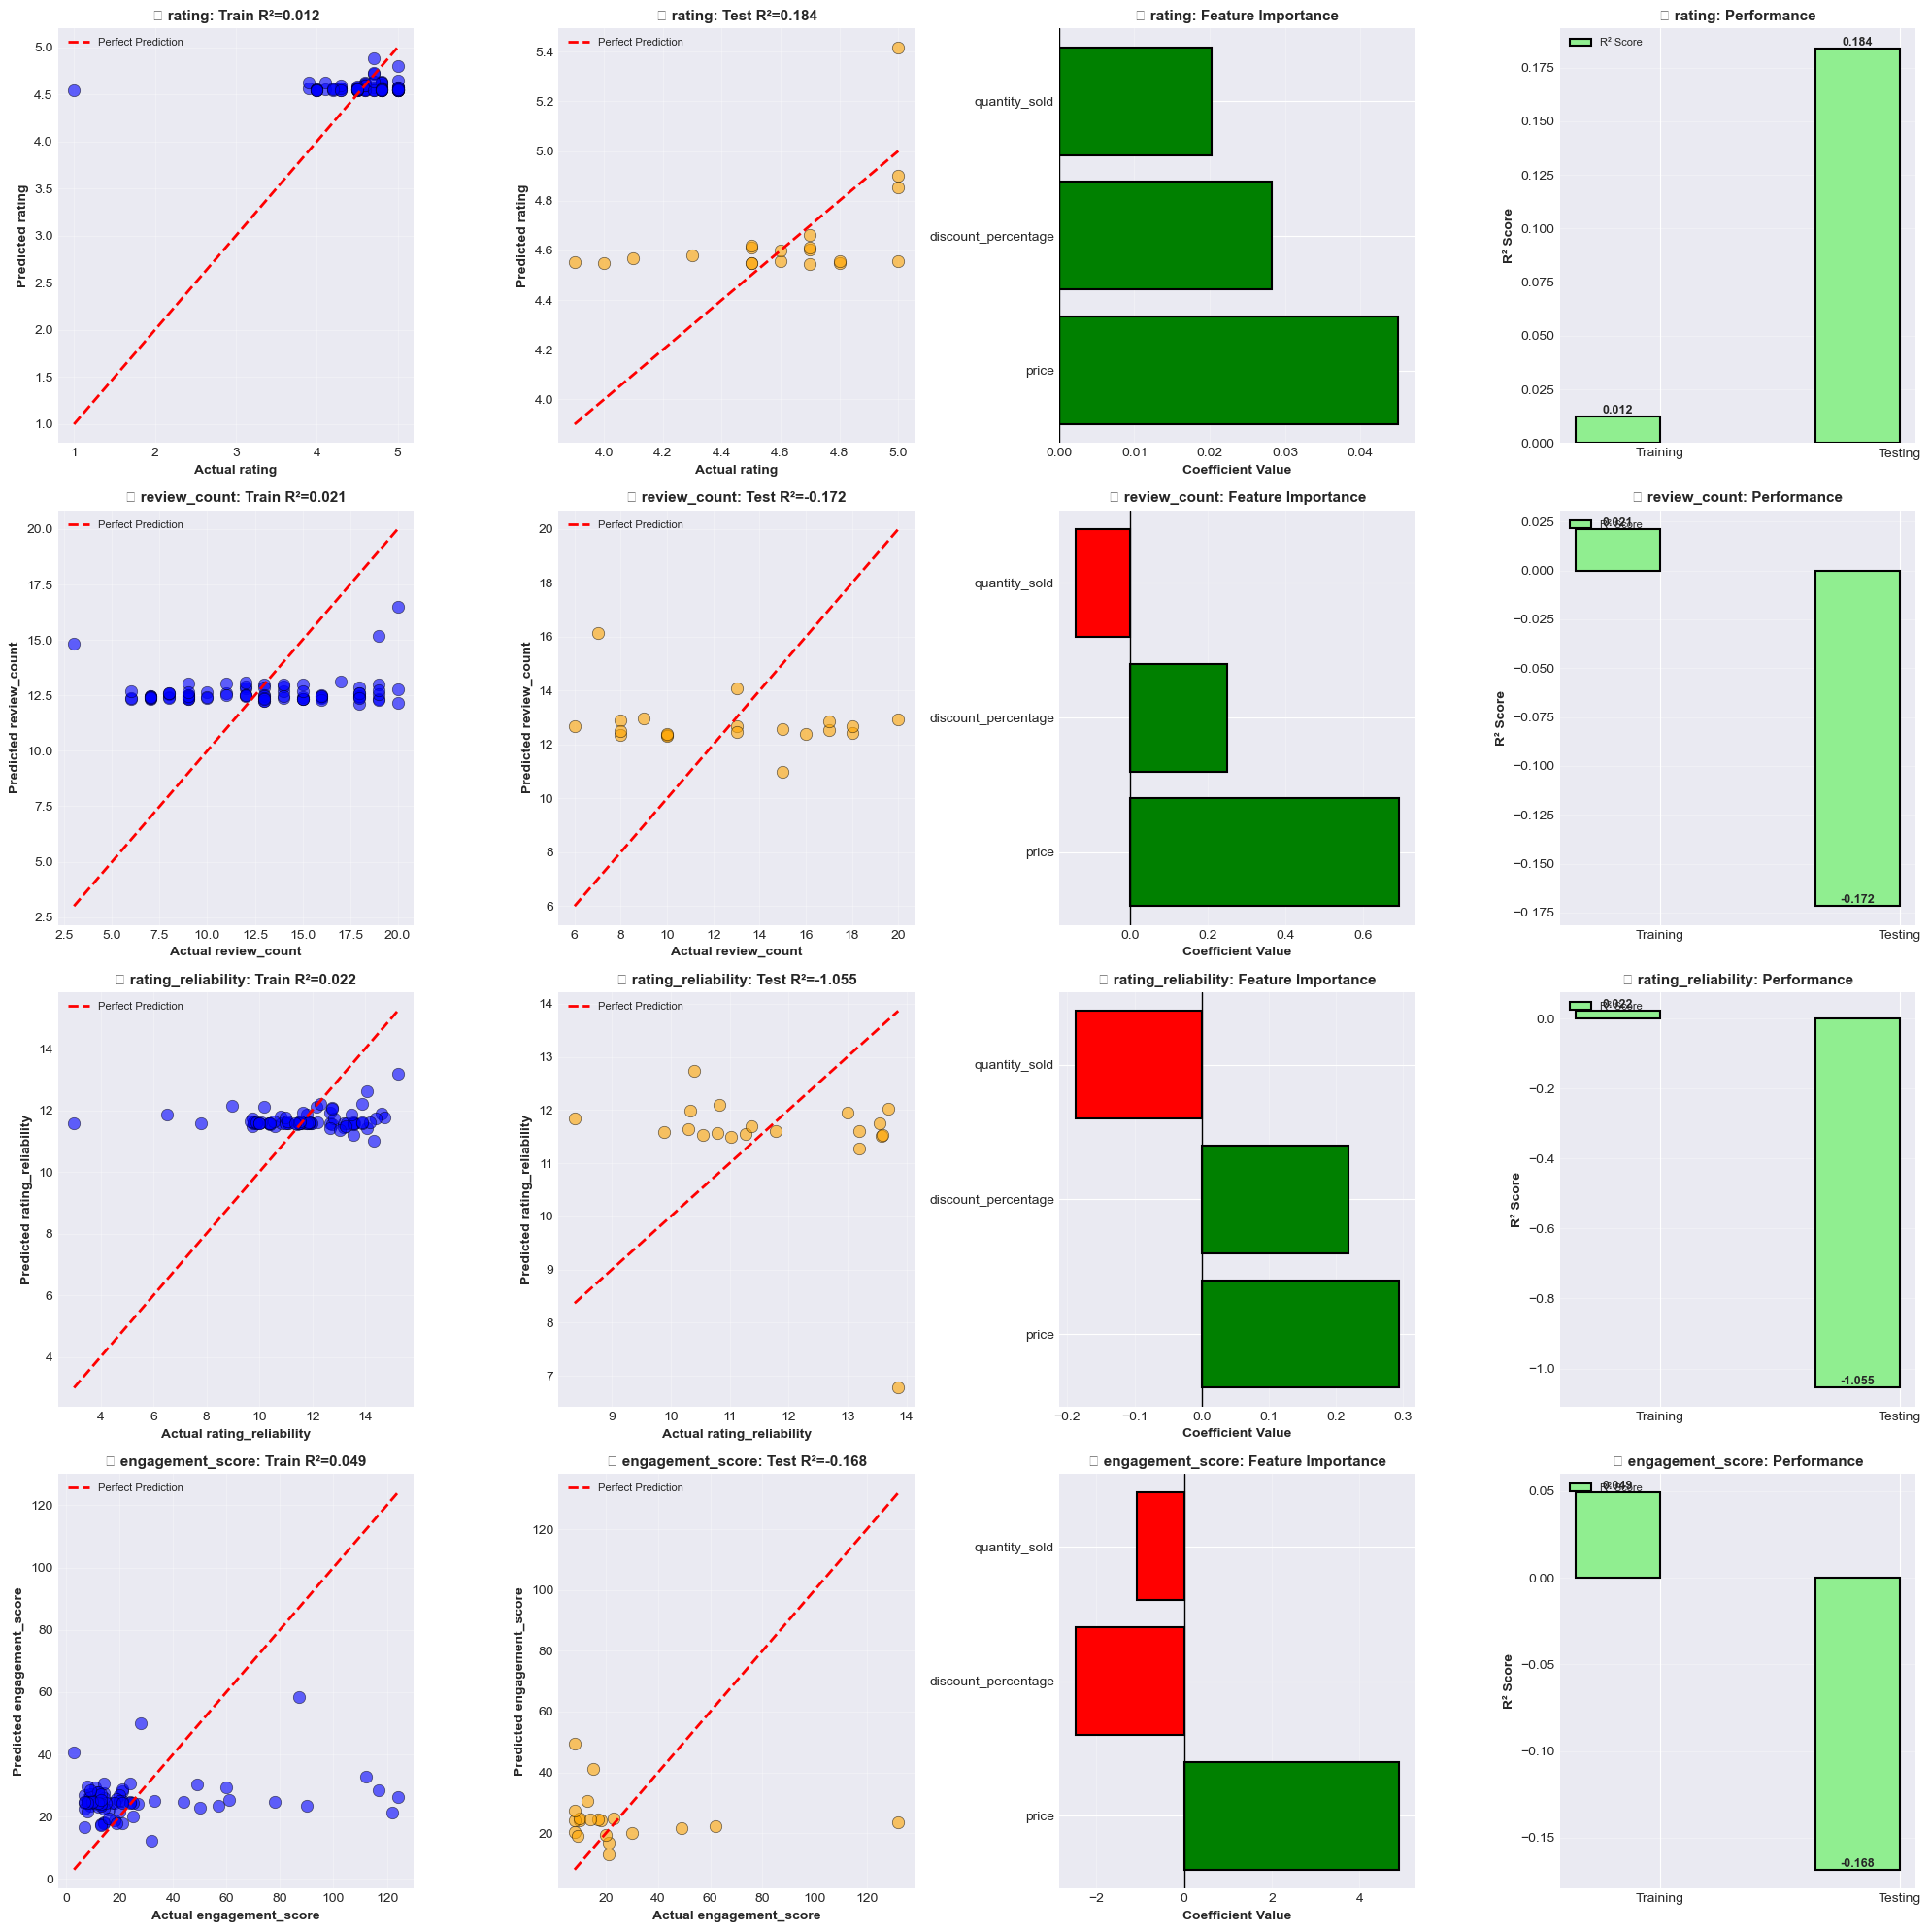


✅ Đã tạo biểu đồ cho tất cả biến phụ thuộc!


In [14]:
# Visualize Linear Regression Results - Cho tất cả biến phụ thuộc
fig = plt.figure(figsize=(20, 5 * len(dependent_features)))

plot_idx = 1

for target_feature in dependent_features:
    result = regression_results[target_feature]
    
    train_r2 = result['train_r2']
    test_r2 = result['test_r2']
    train_mse = result['train_mse']
    test_mse = result['test_mse']
    y_train = result['y_train']
    y_test = result['y_test']
    y_train_pred = result['y_train_pred']
    y_test_pred = result['y_test_pred']
    feature_importance = result['feature_importance']
    
    # 1. Actual vs Predicted - Training Set
    ax1 = plt.subplot(len(dependent_features), 4, plot_idx)
    ax1.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='black', linewidth=0.5, s=80, color='blue')
    ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel(f'Actual {target_feature}', fontsize=10, fontweight='bold')
    ax1.set_ylabel(f'Predicted {target_feature}', fontsize=10, fontweight='bold')
    ax1.set_title(f'📊 {target_feature}: Train R²={train_r2:.3f}', fontsize=11, fontweight='bold')
    ax1.legend(fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # 2. Actual vs Predicted - Testing Set
    ax2 = plt.subplot(len(dependent_features), 4, plot_idx + 1)
    ax2.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='black', linewidth=0.5, s=80, color='orange')
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
    ax2.set_xlabel(f'Actual {target_feature}', fontsize=10, fontweight='bold')
    ax2.set_ylabel(f'Predicted {target_feature}', fontsize=10, fontweight='bold')
    ax2.set_title(f'📊 {target_feature}: Test R²={test_r2:.3f}', fontsize=11, fontweight='bold')
    ax2.legend(fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # 3. Feature Importance
    ax3 = plt.subplot(len(dependent_features), 4, plot_idx + 2)
    colors_fi = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
    bars = ax3.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
                    color=colors_fi, edgecolor='black', linewidth=1.5)
    ax3.set_xlabel('Coefficient Value', fontsize=10, fontweight='bold')
    ax3.set_title(f'📊 {target_feature}: Feature Importance', fontsize=11, fontweight='bold')
    ax3.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax3.grid(True, alpha=0.3, axis='x')
    
    # 4. Model Performance Comparison
    ax4 = plt.subplot(len(dependent_features), 4, plot_idx + 3)
    x_pos = np.arange(2)
    width = 0.35
    
    bars1 = ax4.bar(x_pos - width/2, [train_r2, test_r2], width, 
                    label='R² Score', color='lightgreen', edgecolor='black', linewidth=1.5)
    ax4.set_ylabel('R² Score', fontsize=10, fontweight='bold')
    ax4.set_title(f'📊 {target_feature}: Performance', fontsize=11, fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(['Training', 'Testing'])
    ax4.legend(loc='upper left', fontsize=8)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar in bars1:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plot_idx += 4

plt.tight_layout()
plt.show()

print("\n✅ Đã tạo biểu đồ cho tất cả biến phụ thuộc!")